# 3.1 Hello World

# 3.1 Hello 텐서플로 2.0

In [1]:
# 3.4 텐서플로 2.0 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

In [5]:
# # Google Colab 운영체제 확인
# import platform
# print(platform.platform())

Darwin-18.0.0-x86_64-i386-64bit


In [2]:
# 3.5 텐서플로우 불러오기, 버전 확인
import tensorflow as tf
print(tf.__version__)

2.1.0


# 3.3 텐서플로 기초

## 3.3.1 랜덤한 수 생성

In [8]:
# 3.7 랜덤한 수 얻기 (균일 분포) : 갯수, 시작범위~종료 범위
rand = tf.random.uniform([1],0,1)
print(rand)

tf.Tensor([0.9820179], shape=(1,), dtype=float32)


In [3]:
# 참고) 랜덤한 수 얻기 (균일 분포) : 갯수, 시작범위~종료 범위 --> 범위를 변경을 하게 되면 값이 변경된다!!!
rand = tf.random.uniform([1],1,10)
print(rand)

tf.Tensor([6.041535], shape=(1,), dtype=float32)


In [4]:
# 3.8 랜덤한 수 여러 개 얻기 (균일 분포)
rand = tf.random.uniform([4],0,1)
print(rand)

tf.Tensor([0.40914297 0.5483899  0.78625107 0.00351632], shape=(4,), dtype=float32)


In [5]:
# 3.9 랜덤한 수 여러 개 얻기 (정규 분포)
rand = tf.random.normal([4],0,1)
print(rand)

tf.Tensor([-0.3565721   1.0515192   0.25920868 -1.0254128 ], shape=(4,), dtype=float32)


## 3.3.2 뉴런 만들기

<img src="img/img_10.png">

In [6]:
# 3.10 sigmoid 함수
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [9]:
# 3.11 뉴런의 입력과 출력 정의
x = 1
y = 0
w = tf.random.normal([1],0,1)
output = sigmoid(x * w)
print(output)

0.44916155472771596


In [10]:
# 3.12 경사 하강법을 이용한 뉴런의 학습
for i in range(1000):
    output = sigmoid(x * w)
    error = y - output
    w = w + x * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)

99 -0.09814658037656411 0.09814658037656411
199 -0.05122809891127967 0.05122809891127967
299 -0.034337282606280134 0.034337282606280134
399 -0.025746328011683296 0.025746328011683296
499 -0.020566893632934263 0.020566893632934263
599 -0.017110544376835863 0.017110544376835863
699 -0.01464279375796178 0.01464279375796178
799 -0.01279382505480185 0.01279382505480185
899 -0.011357392529325371 0.011357392529325371
999 -0.010209699999013454 0.010209699999013454


In [13]:
for i in range(1000):
    output = sigmoid(x * w)
    error = y - output
    w = w + x * 0.8 * error
    
    if i % 100 == 99:
        print(i, error, output)

99 -0.0020967736449799784 0.0020967736449799784
199 -0.001795881580983913 0.001795881580983913
299 -0.0015704751159942856 0.0015704751159942856
399 -0.0013953248878023094 0.0013953248878023094
499 -0.0012553122665203227 0.0012553122665203227
599 -0.0011408215442981855 0.0011408215442981855
699 -0.0010454690231770651 0.0010454690231770651
799 -0.0009648219625065387 0.0009648219625065387
899 -0.0008957231681969575 0.0008957231681969575
999 -0.000835858093687205 0.000835858093687205


* 아래 결과에 주의!!!) 학습이 이루어지지 않고 있으며, 이에 대한 것은 입력값 X=0이기 때문에 변화가 발생하지 않음!!!---> 이러한 것을 방지하고자 Bias에 특정한 값을 넣어주게 된다!!!

In [14]:
# 3.13 x=0 일 때 y=1 을 얻는 뉴런의 학습
# --> 주의!!!) 아래의 경우는 입력 X=0이기 때문에 전혀 변화가 없음
# ------> 이러한 일을 방지하고자 Bias를 넣어주게 된다!!!!!!!!
x = 0
y = 1
w = tf.random.normal([1],0,1)

for i in range(1000):
    output = sigmoid(x * w)
    error = y - output
    w = w + x * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)

99 0.5 0.5
199 0.5 0.5
299 0.5 0.5
399 0.5 0.5
499 0.5 0.5
599 0.5 0.5
699 0.5 0.5
799 0.5 0.5
899 0.5 0.5
999 0.5 0.5


In [15]:
# 3.14 x=0 일 때 y=1 을 얻는 뉴런의 학습에 편향을 더함
x = 0
y = 1
w = tf.random.normal([1],0,1)
b = tf.random.normal([1],0,1)

for i in range(1000):
    output = sigmoid(x * w + 1 * b)
    error = y - output
    w = w + x * 0.1 * error
    b = b + 1 * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)

99 0.1051657224024064 0.8948342775975936
199 0.05317843423987101 0.946821565760129
299 0.03521821597583141 0.9647817840241686
399 0.026242789834819646 0.9737572101651804
499 0.020884123265431986 0.979115876734568
599 0.017330310034181617 0.9826696899658184
699 0.014803777177855526 0.9851962228221445
799 0.012916757855909844 0.9870832421440902
899 0.011454355556935858 0.9885456444430641
999 0.01028807293376166 0.9897119270662383


## 3.3.3 첫번째 신경망 네트워크 : AND

In [16]:
# 3.15 True, False 의 정수값 확인
print(int(True))
print(int(False))

1
0


In [17]:
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
x

array([[1, 1],
       [1, 0],
       [0, 1],
       [0, 0]])

In [18]:
# x의 처음 원소에 대한 접근 방식!!!
x[0]

array([1, 1])

In [19]:
# 3.16 첫번째 신경망 네트워크 : AND
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[1], [0], [0], [0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)

199 -0.11234110665102837
399 -0.06641502247177097
599 -0.04703792771607253
799 -0.03630763043211719
999 -0.029508893734912
1199 -0.024825713096878328
1399 -0.021408950752863153
1599 -0.018809234669060957
1799 -0.01676520109930286
1999 -0.01511780761743383


In [22]:
# 3.17 파이썬에서 리스트에 정수를 곱하기

# 대상) 쌩 파이썬의 리스트!!!!!
# 결과 주의!!!!) 파이썬의 리스트의 경우에는 결과 값이 양의 정수인 경우 --> 그 만큼 복사!!!
#                      양의 소수인 경우에는 ---> 에러!!!!
#                       0이하인 수는 ----> 빈 리스트!!!!
print([1,2,3]*2)
# print([1,2,3]*1.3)

print([1,2,3]*0)
print([1,2,3]*-1)

[1, 2, 3, 1, 2, 3]
[]
[]


In [19]:
# 3.18 파이썬에서 리스트에 실수를 곱하기
print([1,2,3]*0.01)

TypeError: can't multiply sequence by non-int of type 'float'

In [23]:
# 3.19 넘파이 array 에 정수, 실수를 곱하기

# NumPy-->벡터 연산으로 모든 원소에 일괄 적용!!!!!!---> 파이썬의 리스트와 크게 다른 사항임!!!!!
import numpy as np
print(np.array([1,2,3])*2)
print(np.array([1,2,3])*0)
print(np.array([1,2,3])*-1)
print(np.array([1,2,3])*0.01)

[2 4 6]
[0 0 0]
[-1 -2 -3]
[0.01 0.02 0.03]


In [24]:
# 3.20 AND 네트워크의 평가
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [1] Output: 0.964705182196799
X: [1 0] Y: [0] Output: 0.025010051519706603
X: [0 1] Y: [0] Output: 0.02508694256083071
X: [0 0] Y: [0] Output: 2.4149154725913355e-05


## 3.3.4 두번째 신경망 네트워크 : OR ---> 잘 보면 내부적인 구조의 변화는 없음!!! 다만 입력/출력만 or로 변경이 되었음!!!!

In [25]:
# 3.21 두번째 신경망 네트워크 : OR
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[1], [1], [1], [0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)

199 -0.04872238794655337
399 -0.02538875430382491
599 -0.0171483622754363
799 -0.012911404705482563
999 -0.010336414149679805
1199 -0.008609534399861854
1399 -0.007372381299352325
1599 -0.006443199346022513
1799 -0.005721024207359229
1999 -0.005141937112214497


In [26]:
# 3.22 OR 네트워크의 평가
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [1] Output: 0.9999972182008927
X: [1 0] Y: [1] Output: 0.9898224336778516
X: [0 1] Y: [1] Output: 0.989764367164458
X: [0 0] Y: [0] Output: 0.0254942629142458


## 3.3.5 세번째 신경망 네트워크 : XOR

In [27]:
# 3.23 세번째 신경망 네트워크 : XOR
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)

199 0.00863789517901492
399 0.00035114282004089503
599 1.4271553619993327e-05
799 5.816941508474116e-07
999 1.8614212393686103e-09
1199 1.8614210173240053e-09
1399 1.8614210173240053e-09
1599 1.8614210173240053e-09
1799 1.8614210173240053e-09
1999 1.8614210173240053e-09


In [28]:
# 3.24 XOR 네트워크의 평가
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [0] Output: 0.5128176323940516
X: [1 0] Y: [1] Output: 0.5128176314633411
X: [0 1] Y: [1] Output: 0.4999999990686774
X: [0 0] Y: [0] Output: 0.49999999813735485


### 중요!!!) 그래서 계수들을 보면 AND의 경우에는 차이가 발생들을 하고 있으나, XOR의 경우에는 거의 엇비슷한 값을 가지고 있다 ---> 이것으로 단순한 NN으로는 XOR을 해결할 수 없음에 대한 1번 시련이 옴!!!

In [26]:
# 3.25 XOR 네트워크의 w, b 값 확인
print('w:', w)
print('b:', b)

w: tf.Tensor([5.1281769e-02 3.7252903e-09], shape=(2,), dtype=float32)
b: tf.Tensor([-7.450581e-09], shape=(1,), dtype=float32)


In [0]:
# 3.26 AND 네트워크의 w, b 값 확인
# w: tf.Tensor([6.9484286 6.951607 ], shape=(2,), dtype=float32)
# b: tf.Tensor([-10.601849], shape=(1,), dtype=float32)

## 이제 쌓아서 해결을 하자!!!!

<img src="img/img_11.png">

In [57]:
# 3.27 tf.keras 를 이용한 XOR 네트워크 계산
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.3), loss='mse')

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [58]:
# 3.28 tf.keras 를 이용한 XOR 네트워크 학습
history = model.fit(x, y, epochs=2000, batch_size=1)

Train on 4 samples
Epoch 1/2000
4/4 [==============================] - 0s 63ms/sample - loss: 0.2970
Epoch 2/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2874
Epoch 3/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.2807
Epoch 4/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2758
Epoch 5/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2722
Epoch 6/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2701
Epoch 7/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.2683
Epoch 8/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2674
Epoch 9/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2656
Epoch 10/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.2661
Epoch 11/2000
4/4 [==============================] - 0s 6ms/sample - loss: 0.2659
Epoch 12/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2650
Epoch

4/4 [==============================] - 0s 4ms/sample - loss: 0.2638
Epoch 101/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2637
Epoch 102/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2637
Epoch 103/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2630
Epoch 104/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2629
Epoch 105/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2631
Epoch 106/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2629
Epoch 107/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2636
Epoch 108/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2636
Epoch 109/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2628
Epoch 110/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2628
Epoch 111/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2629
Epoch 112/2000
4/4 

4/4 [==============================] - 0s 4ms/sample - loss: 0.2621
Epoch 199/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2622
Epoch 200/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2614
Epoch 201/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2621
Epoch 202/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2614
Epoch 203/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2621
Epoch 204/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2621
Epoch 205/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2620
Epoch 206/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2614
Epoch 207/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2614
Epoch 208/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2613
Epoch 209/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2619
Epoch 210/2000
4/4 

4/4 [==============================] - 0s 4ms/sample - loss: 0.2603
Epoch 297/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2596
Epoch 298/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2602
Epoch 299/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2596
Epoch 300/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2602
Epoch 301/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2602
Epoch 302/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2595
Epoch 303/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2595
Epoch 304/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.2601
Epoch 305/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2596
Epoch 306/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2601
Epoch 307/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2600
Epoch 308/2000
4/4 

4/4 [==============================] - 0s 5ms/sample - loss: 0.2554
Epoch 395/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.2557
Epoch 396/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2556
Epoch 397/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.2550
Epoch 398/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2554
Epoch 399/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2553
Epoch 400/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.2552
Epoch 401/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2552
Epoch 402/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2551
Epoch 403/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2544
Epoch 404/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2550
Epoch 405/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2548
Epoch 406/2000
4/4 

4/4 [==============================] - 0s 4ms/sample - loss: 0.2392
Epoch 493/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2388
Epoch 494/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2392
Epoch 495/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2382
Epoch 496/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2386
Epoch 497/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2383
Epoch 498/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2381
Epoch 499/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2376
Epoch 500/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2374
Epoch 501/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2371
Epoch 502/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2369
Epoch 503/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2367
Epoch 504/2000
4/4 

4/4 [==============================] - 0s 4ms/sample - loss: 0.2109
Epoch 591/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.2108
Epoch 592/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2103
Epoch 593/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2104
Epoch 594/2000
4/4 [==============================] - ETA: 0s - loss: 0.171 - 0s 3ms/sample - loss: 0.2101
Epoch 595/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2099
Epoch 596/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2091
Epoch 597/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2094
Epoch 598/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2086
Epoch 599/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2089
Epoch 600/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2085
Epoch 601/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.

4/4 [==============================] - 0s 3ms/sample - loss: 0.1911
Epoch 689/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1912
Epoch 690/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1906
Epoch 691/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1908
Epoch 692/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1907
Epoch 693/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1903
Epoch 694/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1901
Epoch 695/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1900
Epoch 696/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1900
Epoch 697/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1896
Epoch 698/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1896
Epoch 699/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1895
Epoch 700/2000
4/4 

4/4 [==============================] - 0s 3ms/sample - loss: 0.1708
Epoch 787/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1704
Epoch 788/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1697
Epoch 789/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1697
Epoch 790/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1692
Epoch 791/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1690
Epoch 792/2000
4/4 [==============================] - ETA: 0s - loss: 0.127 - 0s 4ms/sample - loss: 0.1686
Epoch 793/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1681
Epoch 794/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1679
Epoch 795/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1675
Epoch 796/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1670
Epoch 797/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.

4/4 [==============================] - 0s 3ms/sample - loss: 0.0950
Epoch 885/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0941
Epoch 886/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0928
Epoch 887/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0920
Epoch 888/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0911
Epoch 889/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0899
Epoch 890/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0889
Epoch 891/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0879
Epoch 892/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0869
Epoch 893/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0860
Epoch 894/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0850
Epoch 895/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0841
Epoch 896/2000
4/4 

4/4 [==============================] - 0s 6ms/sample - loss: 0.0336
Epoch 983/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0333
Epoch 984/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0330
Epoch 985/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0327
Epoch 986/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0324
Epoch 987/2000
4/4 [==============================] - 0s 6ms/sample - loss: 0.0321
Epoch 988/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0318
Epoch 989/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0316
Epoch 990/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0313
Epoch 991/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0310
Epoch 992/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0308
Epoch 993/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0305
Epoch 994/2000
4/4 

4/4 [==============================] - 0s 3ms/sample - loss: 0.0170
Epoch 1080/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0169
Epoch 1081/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0168
Epoch 1082/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0167
Epoch 1083/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0166
Epoch 1084/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0165
Epoch 1085/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0164
Epoch 1086/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0164
Epoch 1087/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0163
Epoch 1088/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0162
Epoch 1089/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0161
Epoch 1090/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0160
Epoch 10

4/4 [==============================] - 0s 3ms/sample - loss: 0.0109
Epoch 1177/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0108
Epoch 1178/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0108
Epoch 1179/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0107
Epoch 1180/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0107
Epoch 1181/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0106
Epoch 1182/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0106
Epoch 1183/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0106
Epoch 1184/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0105
Epoch 1185/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0105
Epoch 1186/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0104
Epoch 1187/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0104
Epoch 11

4/4 [==============================] - 0s 4ms/sample - loss: 0.0078
Epoch 1274/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0078
Epoch 1275/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0078
Epoch 1276/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0078
Epoch 1277/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0077
Epoch 1278/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0077
Epoch 1279/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0077
Epoch 1280/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0077
Epoch 1281/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0076
Epoch 1282/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.0076
Epoch 1283/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0076
Epoch 1284/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0076
Epoch 12

4/4 [==============================] - 0s 3ms/sample - loss: 0.0061
Epoch 1371/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0060
Epoch 1372/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0060
Epoch 1373/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0060
Epoch 1374/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0060
Epoch 1375/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0060
Epoch 1376/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0060
Epoch 1377/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0060
Epoch 1378/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0060
Epoch 1379/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0059
Epoch 1380/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0059
Epoch 1381/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0059
Epoch 13

4/4 [==============================] - 0s 3ms/sample - loss: 0.0049
Epoch 1468/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0049
Epoch 1469/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0049
Epoch 1470/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0049
Epoch 1471/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0049
Epoch 1472/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0049
Epoch 1473/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0049
Epoch 1474/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0049
Epoch 1475/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0048
Epoch 1476/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0048
Epoch 1477/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0048
Epoch 1478/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0048
Epoch 14

4/4 [==============================] - 0s 3ms/sample - loss: 0.0041
Epoch 1565/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0041
Epoch 1566/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0041
Epoch 1567/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0041
Epoch 1568/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0041
Epoch 1569/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0041
Epoch 1570/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0041
Epoch 1571/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0041
Epoch 1572/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0041
Epoch 1573/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0041
Epoch 1574/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0041
Epoch 1575/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0041
Epoch 15

4/4 [==============================] - 0s 3ms/sample - loss: 0.0035
Epoch 1662/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0035
Epoch 1663/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0035
Epoch 1664/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0035
Epoch 1665/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0035
Epoch 1666/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0035
Epoch 1667/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0035
Epoch 1668/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0035
Epoch 1669/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0035
Epoch 1670/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0035
Epoch 1671/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0035
Epoch 1672/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0035
Epoch 16

4/4 [==============================] - 0s 3ms/sample - loss: 0.0031
Epoch 1759/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0031
Epoch 1760/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0031
Epoch 1761/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0031
Epoch 1762/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0031
Epoch 1763/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0031
Epoch 1764/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0031
Epoch 1765/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0031
Epoch 1766/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0031
Epoch 1767/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0031
Epoch 1768/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0031
Epoch 1769/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0031
Epoch 17

4/4 [==============================] - 0s 3ms/sample - loss: 0.0028
Epoch 1856/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0028
Epoch 1857/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0027
Epoch 1858/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0027
Epoch 1859/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0027
Epoch 1860/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0027
Epoch 1861/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0027
Epoch 1862/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0027
Epoch 1863/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0027
Epoch 1864/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0027
Epoch 1865/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0027
Epoch 1866/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0027
Epoch 18

4/4 [==============================] - 0s 4ms/sample - loss: 0.0025
Epoch 1953/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0025
Epoch 1954/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0025
Epoch 1955/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0025
Epoch 1956/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0025
Epoch 1957/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0025
Epoch 1958/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0025
Epoch 1959/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0025
Epoch 1960/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0025
Epoch 1961/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0024
Epoch 1962/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0024
Epoch 1963/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0024
Epoch 19

In [59]:
# 3.29 tf.keras 를 이용한 XOR 네트워크 평가
model.predict(x)

array([[0.04290117],
       [0.9563816 ],
       [0.94291145],
       [0.0487753 ]], dtype=float32)

In [60]:
# 3.30 XOR 네트워크의 가중치와 편향 확인
for weight in model.weights:
    print(weight)

<tf.Variable 'dense_4/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[ 5.79748  ,  5.021907 ],
       [-5.8294187, -4.7810254]], dtype=float32)>
<tf.Variable 'dense_4/bias:0' shape=(2,) dtype=float32, numpy=array([-3.2572906,  2.3506942], dtype=float32)>
<tf.Variable 'dense_5/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[ 7.5142674],
       [-7.273842 ]], dtype=float32)>
<tf.Variable 'dense_5/bias:0' shape=(1,) dtype=float32, numpy=array([3.391892], dtype=float32)>


## 3.4.2 2-레이어 XOR 네트워크의 정보 시각화

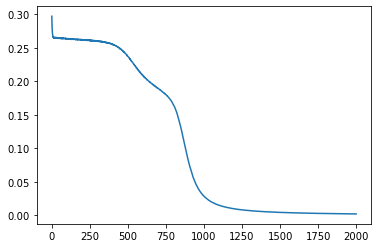

In [61]:
# 3.34 2-레이어 XOR 네트워크의 loss 변화를 선 그래프로 표시
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

## 중요!!!) 위의 경우에 있어서 optimizer의 lr을 수정을 하고, epoch등을 수정을 하면 xor의 결과가 안 나올 수 있음!!!!!!!!!!!!---> 적당한 값이 중요함!!! 이는 지금은 데이터가 없어서 발생을 함;;;


In [62]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

print (model.summary())
history = model.fit(x, y, epochs=300, batch_size=1)
model.predict(x)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
None
Train on 4 samples
Epoch 1/300
4/4 [==============================] - 0s 65ms/sample - loss: 0.2582
Epoch 2/300
4/4 [==============================] - 0s 4ms/sample - loss: 0.2577
Epoch 3/300
4/4 [==============================] - 0s 5ms/sample - loss: 0.2573
Epoch 4/300
4/4 [==============================] - 0s 5ms/sample - loss: 0.2570
Epoch 5/300
4/4 [==============================] - 0s 4ms/sample - loss: 0.2566
Epoch 6/300
4/4 [==============================] - 0s 4ms/sample - loss: 0.2562
Epoch 7/300
4/4 [

4/4 [==============================] - 0s 4ms/sample - loss: 0.2546
Epoch 95/300
4/4 [==============================] - 0s 4ms/sample - loss: 0.2546
Epoch 96/300
4/4 [==============================] - 0s 3ms/sample - loss: 0.2547
Epoch 97/300
4/4 [==============================] - 0s 4ms/sample - loss: 0.2547
Epoch 98/300
4/4 [==============================] - 0s 3ms/sample - loss: 0.2547
Epoch 99/300
4/4 [==============================] - 0s 3ms/sample - loss: 0.2547
Epoch 100/300
4/4 [==============================] - 0s 3ms/sample - loss: 0.2546
Epoch 101/300
4/4 [==============================] - 0s 3ms/sample - loss: 0.2547
Epoch 102/300
4/4 [==============================] - 0s 3ms/sample - loss: 0.2546
Epoch 103/300
4/4 [==============================] - 0s 3ms/sample - loss: 0.2546
Epoch 104/300
4/4 [==============================] - 0s 3ms/sample - loss: 0.2547
Epoch 105/300
4/4 [==============================] - 0s 4ms/sample - loss: 0.2547
Epoch 106/300
4/4 [================

4/4 [==============================] - 0s 4ms/sample - loss: 0.2545
Epoch 195/300
4/4 [==============================] - 0s 3ms/sample - loss: 0.2545
Epoch 196/300
4/4 [==============================] - 0s 3ms/sample - loss: 0.2543
Epoch 197/300
4/4 [==============================] - 0s 3ms/sample - loss: 0.2544
Epoch 198/300
4/4 [==============================] - 0s 4ms/sample - loss: 0.2544
Epoch 199/300
4/4 [==============================] - 0s 3ms/sample - loss: 0.2544
Epoch 200/300
4/4 [==============================] - 0s 4ms/sample - loss: 0.2544
Epoch 201/300
4/4 [==============================] - 0s 4ms/sample - loss: 0.2543
Epoch 202/300
4/4 [==============================] - 0s 4ms/sample - loss: 0.2544
Epoch 203/300
4/4 [==============================] - 0s 4ms/sample - loss: 0.2544
Epoch 204/300
4/4 [==============================] - 0s 4ms/sample - loss: 0.2544
Epoch 205/300
4/4 [==============================] - 0s 3ms/sample - loss: 0.2544
Epoch 206/300
4/4 [===========

4/4 [==============================] - 0s 4ms/sample - loss: 0.2540
Epoch 295/300
4/4 [==============================] - 0s 3ms/sample - loss: 0.2540
Epoch 296/300
4/4 [==============================] - 0s 6ms/sample - loss: 0.2539
Epoch 297/300
4/4 [==============================] - 0s 5ms/sample - loss: 0.2539
Epoch 298/300
4/4 [==============================] - 0s 4ms/sample - loss: 0.2540
Epoch 299/300
4/4 [==============================] - 0s 4ms/sample - loss: 0.2539
Epoch 300/300
4/4 [==============================] - 0s 4ms/sample - loss: 0.2540


array([[0.5222207 ],
       [0.5100889 ],
       [0.5008599 ],
       [0.48090023]], dtype=float32)